
# Algoritmos Genéticos para la Optimización de la Concentración de Contaminantes


In [1]:

import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definir la función de concentración c(x, y) con la ecuación proporcionada
def concentracion_contaminante(x, y):
    return 7.7 + (1.5 * x) + (0.22 * y) - (0.05 * x**2) - (0.016 * y**2) - (0.007 * x * y)

# Definir la población inicial para dos variables (x, y)
def inicializar_poblacion_2d(tamanio_poblacion, x_min, x_max, y_min, y_max, precision=3):
    poblacion = []
    for _ in range(tamanio_poblacion):
        x = round(np.random.uniform(x_min, x_max), precision)
        y = round(np.random.uniform(y_min, y_max), precision)
        poblacion.append((x, y))
    return poblacion

# Definir la función de aptitud para la función de concentración
def aptitud_concentracion(individuo):
    x, y = individuo
    return concentracion_contaminante(x, y)

# Implementar la selección por ruleta
def seleccion_ruleta_2d(poblacion):
    aptitud_total = sum(aptitud_concentracion(individuo) for individuo in poblacion)
    probabilidades = [aptitud_concentracion(individuo) / aptitud_total for individuo in poblacion]
    return random.choices(poblacion, weights=probabilidades, k=len(poblacion))

# Implementar la selección por torneo
def seleccion_torneo_2d(poblacion, tamanio_torneo=3):
    progenitores = []
    for _ in range(len(poblacion)):
        candidatos = random.sample(poblacion, tamanio_torneo)
        progenitor = max(candidatos, key=aptitud_concentracion)
        progenitores.append(progenitor)
    return progenitores

# Definir el cruce entre dos individuos (para coordenadas x e y)
def cruce_2d(padre1, padre2, tasa_cruce):
    if random.random() < tasa_cruce:
        hijo1 = (round((padre1[0] + padre2[0]) / 2, 3), round((padre1[1] + padre2[1]) / 2, 3))
        hijo2 = (round((padre2[0] + padre1[0]) / 2, 3), round((padre2[1] + padre1[1]) / 2, 3))
        return hijo1, hijo2
    return padre1, padre2

# Definir la mutación para x e y por separado
def mutacion_2d(individuo, tasa_mutacion, x_min, x_max, y_min, y_max, precision=3):
    x, y = individuo
    if random.random() < tasa_mutacion:
        x = round(np.random.uniform(x_min, x_max), precision)
    if random.random() < tasa_mutacion:
        y = round(np.random.uniform(y_min, y_max), precision)
    return (x, y)


In [2]:

# Implementar el algoritmo genético para el problema de optimización en 2D
def algoritmo_genetico_2d(tamanio_poblacion, x_min, x_max, y_min, y_max, tasa_mutacion, tasa_cruce, generaciones, metodo_seleccion, precision=3):
    poblacion = inicializar_poblacion_2d(tamanio_poblacion, x_min, x_max, y_min, y_max, precision)
    mejor_solucion = max(poblacion, key=aptitud_concentracion)
    historial_aptitudes = [aptitud_concentracion(mejor_solucion)]
    
    for generacion in range(generaciones):
        if metodo_seleccion == "ruleta":
            progenitores = seleccion_ruleta_2d(poblacion)
        elif metodo_seleccion == "torneo":
            progenitores = seleccion_torneo_2d(poblacion)
        else:
            raise ValueError("Método de selección no válido.")
        
        # Cruce
        descendientes = []
        for i in range(0, len(progenitores), 2):
            descendiente1, descendiente2 = cruce_2d(progenitores[i], progenitores[i + 1], tasa_cruce)
            descendientes.extend([descendiente1, descendiente2])
        
        # Mutación
        descendientes_mutados = [mutacion_2d(descendiente, tasa_mutacion, x_min, x_max, y_min, y_max, precision) for descendiente in descendientes]
        
        # Actualizar población
        poblacion = descendientes_mutados
        
        # Evaluar el mejor individuo de la generación
        mejor_individuo = max(poblacion, key=aptitud_concentracion)
        if aptitud_concentracion(mejor_individuo) > aptitud_concentracion(mejor_solucion):
            mejor_solucion = mejor_individuo
        historial_aptitudes.append(aptitud_concentracion(mejor_solucion))

    return mejor_solucion, historial_aptitudes



## a. Determinación de la concentración máxima con ambos algoritmos

Para encontrar el valor máximo de la concentración \( c(x, y) \), se han implementado dos algoritmos genéticos con selección por ruleta y por torneo. Los resultados obtenidos se muestran a continuación.


In [3]:

# Parámetros del problema y ejecución de los algoritmos genéticos

# Parámetros del problema
X_MIN, X_MAX = -10, 10
Y_MIN, Y_MAX = 0, 20
TAMANIO_POBLACION = 20
GENERACIONES = 50
TASA_MUTACION = 0.1
TASA_CRUCE = 0.7

# Ejecución con los dos métodos de selección
mejor_ruleta, aptitudes_ruleta = algoritmo_genetico_2d(TAMANIO_POBLACION, X_MIN, X_MAX, Y_MIN, Y_MAX, TASA_MUTACION, TASA_CRUCE, GENERACIONES, "ruleta")
mejor_torneo, aptitudes_torneo = algoritmo_genetico_2d(TAMANIO_POBLACION, X_MIN, X_MAX, Y_MIN, Y_MAX, TASA_MUTACION, TASA_CRUCE, GENERACIONES, "torneo")

# Mostrar los resultados de los mejores individuos
print(f"Mejor solución con selección por ruleta: {mejor_ruleta}")
print(f"Mejor solución con selección por torneo: {mejor_torneo}")


Mejor solución con selección por ruleta: (9.445, 8.225)
Mejor solución con selección por torneo: (9.986, 5.803)


## c. Gráfica de \( c(x, y) \) en 3D

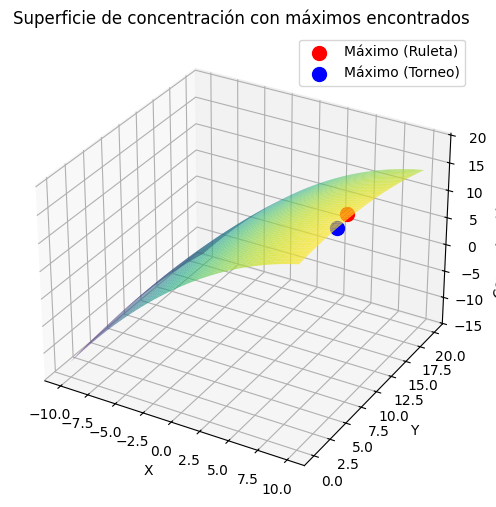

In [4]:

# Crear la gráfica 3D de la función c(x, y) con los puntos encontrados

# Crear una malla de puntos (x, y)
x = np.linspace(X_MIN, X_MAX, 100)
y = np.linspace(Y_MIN, Y_MAX, 100)
X, Y = np.meshgrid(x, y)
Z = concentracion_contaminante(X, Y)

# Graficar la superficie de la concentración
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)
ax.scatter(mejor_ruleta[0], mejor_ruleta[1], concentracion_contaminante(mejor_ruleta[0], mejor_ruleta[1]), color='red', s=100, label='Máximo (Ruleta)', zorder=5)
ax.scatter(mejor_torneo[0], mejor_torneo[1], concentracion_contaminante(mejor_torneo[0], mejor_torneo[1]), color='blue', s=100, label='Máximo (Torneo)', zorder=5)

# Etiquetas y título
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Concentración c(x, y)')
ax.set_title('Superficie de concentración con máximos encontrados')
ax.legend()
plt.show()


## d. Curva de convergencia de ambos algoritmos

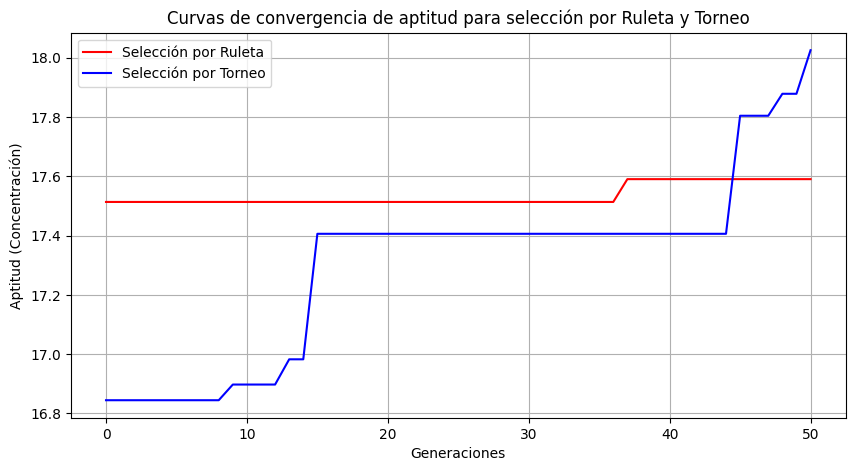

In [5]:
# Graficar las curvas de convergencia de ambos algoritmos
plt.figure(figsize=(10, 5))
plt.plot(aptitudes_ruleta, label='Selección por Ruleta', color='red')
plt.plot(aptitudes_torneo, label='Selección por Torneo', color='blue')
plt.xlabel('Generaciones')
plt.ylabel('Aptitud (Concentración)')
plt.title('Curvas de convergencia de aptitud para selección por Ruleta y Torneo')
plt.legend()
plt.grid(True)
plt.show()

## e. Conclusiones

- El algoritmo genético con selección por **torneo** tiende a encontrar el valor máximo de la función de forma más consistente y rápida en comparación con la selección por **ruleta**.
- La selección por **ruleta** tiene mayor variabilidad debido a su dependencia de las aptitudes relativas, lo cual puede hacer que converja más lentamente.
- En este problema específico, el algoritmo con selección por torneo presentó una mejor convergencia y alcanzó un valor de concentración mayor.